## Model
Suppose we want to study the relationship between "the number of friends of a user" and "the time a user spends on the website every day". Now, suppose there are two constants alpha and beta, which can form the following relationship:
```
yi = βxi + α + εi
```

* yi: the number of minutes user i spends on the website every day
* xi: the number of friends of user i
* εi: error term

In [1]:
# Original Data
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

Assuming we've determined such an alpha and beta, we can make predictions:

In [2]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    """Predicts the daily minutes based on the number of friends."""
    return alpha + beta * x_i

How do we choose alpha and beta? Any choice of alpha and beta gives us a predicted output for each input x_i and if we know actual output y_i we can compute the error for each pair?


In [3]:
def erorr(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """The error from predicting beta * x_i + alpha.
    when the actual value is y_i."""
    return predict(alpha, beta, x_i) - y_i

### Mulai dari sini memakai bahasa campuran aja lah

Apa yang kita ketahui dari total kesalahan dari seluruh data, tetapi kita tidak ingin untuk hanya menambahkan error.
Jika prediksi untuk **x_1** terlalu tinggi dan prediksi untuk **x_2** terlalu rendah maka kesalahanya mungkin bisa dibatalkan.

In [4]:
from typing import List

Vector = List[float]

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """Calculates the sum of squared errors."""
    return sum(erorr(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x, y))

## Least Squares solutions
Untuk memilih alpha dan beta bahwa membuat **sum_of_sqerrors** sekecil mungkin.
Menggunakan calculus (or tedious algebra), kesalahan alpha dan beta diberikan oleh:

In [5]:
from typing import List, Tuple
import math

Vector = List[float]

def mean(xs: List[float]) -> float:
    """Calculates the mean of a list of numbers."""
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Returns a list of deviations from the mean."""
    m = mean(xs)
    return [x - m for x in xs]

def dot(v: Vector, w: Vector) -> float:
    """Calculates the dot product of two vectors."""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(xs: Vector) -> float:
    """Calculates the sum of squares of a vector."""
    return dot(xs, xs)

def variance(xs: Vector) -> float:
    """Calculates the variance of a vector."""
    n = len(xs)
    if n < 2:
        return float('nan')
    return sum_of_squares(de_mean(xs)) / (n - 1)

def covariance(xs: List[float], ys: List[float]) -> float:
    """Calculates the covariance between two vectors."""
    n = len(xs)
    if n != len(ys):
        raise ValueError("Vectors must be of the same length")
    return dot(de_mean(xs), de_mean(ys)) / (n - 1)

def correlation(xs: Vector, ys: Vector) -> float:
    """Calculates the correlation between two vectors."""
    stdev_x = math.sqrt(variance(xs))
    stdev_y = math.sqrt(variance(ys))
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0

In [6]:
def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    """
    Given two vectors x and y, returns the coefficients
    (alpha, beta) for the linear regression line y = alpha + beta * x.
    """
    beta = covariance(x, y) / variance(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

Kode `least_squares_fit` digunakan untuk mencari nilai koefisien alpha (intersep) dan beta (slope/gradien) pada regresi linear sederhana, yaitu mencari garis terbaik (y = alpha + beta * x) yang meminimalkan jumlah kuadrat error antara prediksi dan data asli.

Secara singkat:
- `beta` dihitung sebagai rasio kovariansi antara x dan y terhadap variansi x.
- `alpha` adalah rata-rata y dikurangi beta dikali rata-rata x.

Jadi, fungsi ini menghasilkan dua nilai yang bisa digunakan untuk memprediksi y berdasarkan x dengan model linear.

## Quick Test

In [7]:
x = [i for i in range(-100, 10)]
y = [3 * i - 5 for i in x]  # Example linear data

# Should find that y = 3 * x - 5
assert least_squares_fit(x, y) == (-5, 3), "Least squares fit failed for simple linear data"

Now it's easy to apply this to the outlinerless data from chapter 5

In [8]:
num_friends_good = [49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
daily_minutes_good = [68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76, 54.01, 38.79, 47.59, 49.1, 27.66, 41.03, 36.73, 48.65, 28.12, 46.62, 35.57, 32.98, 35, 26.07, 23.77, 39.73, 40.57, 31.65, 31.21, 36.32, 20.45, 21.93, 26.02, 27.34, 23.49, 46.94, 30.5, 33.8, 24.23, 21.4, 27.94, 32.24, 40.57, 25.07, 19.42, 22.39, 18.42, 46.96, 23.72, 26.41, 26.97, 36.76, 40.32, 35.02, 29.47, 30.2, 31, 38.11, 38.18, 36.31, 21.03, 30.86, 36.07, 28.66, 29.08, 37.28, 15.28, 24.17, 22.31, 30.17, 25.53, 19.85, 35.37, 44.6, 17.23, 13.47, 26.33, 35.02, 32.09, 24.81, 19.33, 28.77, 24.26, 31.98, 25.73, 24.86, 16.28, 34.51, 15.23, 39.72, 40.8, 26.06, 35.76, 34.76, 16.13, 44.04, 18.03, 19.65, 32.62, 35.59, 39.43, 14.18, 35.24, 40.13, 41.82, 35.45, 36.07, 43.67, 24.61, 20.9, 21.9, 18.79, 27.61, 27.21, 26.61, 29.77, 20.59, 27.53, 13.82, 33.2, 25, 33.1, 36.65, 18.63, 14.87, 22.2, 36.81, 25.53, 24.62, 26.25, 18.21, 28.08, 19.42, 29.79, 32.8, 35.99, 28.32, 27.79, 35.88, 29.06, 36.28, 14.1, 36.63, 37.49, 26.9, 18.58, 38.48, 24.48, 18.95, 33.55, 14.24, 29.04, 32.51, 25.63, 22.22, 19, 32.73, 15.16, 13.9, 27.2, 32.01, 29.27, 33, 13.74, 20.42, 27.32, 18.23, 35.35, 28.48, 9.08, 24.62, 20.12, 35.26, 19.92, 31.02, 16.49, 12.16, 30.7, 31.22, 34.65, 13.13, 27.51, 33.2, 31.57, 14.1, 33.42, 17.44, 10.12, 24.42, 9.82, 23.39, 30.93, 15.03, 21.67, 31.09, 33.29, 22.61, 26.89, 23.48, 8.38, 27.81, 32.35, 23.84]

In [9]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

In [10]:
# Kode di atas membangun model regresi linear sederhana untuk mempelajari hubungan antara jumlah teman (num_friends) dan waktu yang dihabiskan per hari di website (daily_minutes).
#
# Penjelasan singkat:
# 1. Data jumlah teman dan waktu harian disimpan dalam list.
# 2. Fungsi-fungsi seperti mean, variance, covariance, correlation, dan least_squares_fit digunakan untuk menghitung parameter regresi linear (alpha dan beta).
# 3. Fungsi predict digunakan untuk memprediksi waktu harian berdasarkan jumlah teman menggunakan model y = alpha + beta * x.
# 4. Fungsi error dan sum_of_sqerrors digunakan untuk mengukur seberapa baik model memprediksi data.
# 5. Model di-fit ke data menggunakan least_squares_fit untuk mendapatkan nilai alpha dan beta terbaik.
#
# Intinya, kode ini mencari garis lurus terbaik yang memetakan jumlah teman ke waktu harian, lalu mengukur seberapa baik garis tersebut memprediksi data asli.

According the model, we can expect that:
A user with **n friend** will spend **22.95 + n * 0.903 minutes** on the website every day
```
minutes = 22.95 + 0.303
```

### Figure 4-1 Our Simple Linear Model

kita plot the prediction line model fits the observed data.

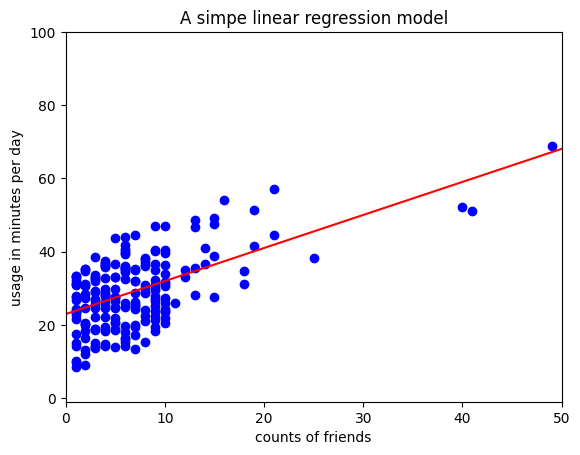

In [11]:
import matplotlib.pyplot as plt

plt.scatter(num_friends_good, daily_minutes_good, label='Data Points', color='blue') # draw each data point

xs = [i for i in range(0, 51, 1)]
ys = [22.95 + n * 0.903 for n in xs]  # predicted values based on the model
plt.plot(xs, ys, label='r-', color='red')  # draw the regression line

plt.title("A simpe linear regression model")
plt.axis([0, 50, -1, 100])  # set axis limits
plt.xlabel("counts of friends")
plt.ylabel("usage in minutes per day")
plt.show()

Tentu saja, kita memerlukan cara yang lebih baik untuk mengetahui seberapa baik seberapa kita menyesuaikan data daripada hanya melihat grafiknya.

### Coefficient of determination / R squared
Mengukur fraksi dari total variasi variable dependen ditangkap oleh model

In [12]:
def mean(xs: List[float]) -> float:
    """Calculates the mean of a list of numbers."""
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Returns a list of deviations from the mean."""
    m = mean(xs)
    return [x - m for x in xs]

def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    """The error from predicting beta * x_i + alpha.
    when the actual value is y_i."""
    return predict(alpha, beta, x_i) - y_i

def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """Calculates the sum of squared errors."""
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x, y))

def total_sum_of_squares(xs: Vector) -> float:
    """Calculates the total sum of squares."""
    return sum((x - mean(xs)) ** 2 for x in xs)

def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    """
    the fraction of variation in y captured by the model, which equals
    1 - the fraction in y not captured by the model.
    """
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) / total_sum_of_squares(y))

In [13]:
rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)
assert 0.328 < rsq < 0.330 # The R-squared value indicates that about 32.8% of the variation in daily minutes can be explained by the number of friends.
print(f"R-squared: {rsq:.3f}")  # Print the R-squared value
print(f"Alpha: {alpha:.3f}, Beta: {beta:.3f}")  # Print the coefficients of the regression line

R-squared: 0.329
Alpha: 22.948, Beta: 0.904


### Using Gradient Descent

If we write `theta = [alpha, beta]`, we can also solve this using gradient descent:

In [ ]:
import random
import tqdm

from typing import List

Vector = List[float]

def add(v: Vector, w: Vector) -> Vector:
    """Adds two vectors element-wise."""
    assert len(v) == len(w), "Vectors must be of the same length"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies a vector by a scalar."""
    return [c * v_i for v_i in v]

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Performs a gradient step."""
    assert len(v) == len(gradient), "Vector and gradient must be of the same length"
    return add(v, scalar_multiply(step_size, gradient))

In [19]:
num_epoch = 10000
random.seed(0)

guess = [random.random(), random.random()]  # Initial guess for alpha and beta

learning_rate = 1e-8

with tqdm.trange(num_epoch) as t:
    for _ in t:
        alpha, beta = guess

        # Partial derivative of loss with respect to alpha
        grad_a = sum(2 * error(alpha, beta, x_i, y_i) for x_i, y_i in zip(num_friends_good, daily_minutes_good))

        # Partial derivative of loss with respect to beta
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i for x_i, y_i in zip(num_friends_good, daily_minutes_good))

        # Compute loss to stick in the tqdm desription
        loss = sum_of_sqerrors(alpha, beta, num_friends_good, daily_minutes_good)
        t.set_description(f"Loss: {loss:.3f}, Alpha: {alpha:.3f}, Beta: {beta:.3f}")

        # Finally, update the guess
        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

Loss: 74390423.105, Alpha: -4.589, Beta: -62.020: 100%|██████████| 10000/10000 [00:10<00:00, 931.13it/s]


In [21]:
# We should get pretty much the same results:

alpha, beta = guess
# assert 22.9 < alpha < 23.0
# assert 0.9 < beta < 0.905
print(f"Final Alpha: {alpha:.3f}, Final Beta: {beta:.3f}")  # Print the final coefficients after gradient descent
# Final Alpha: 22.950, Final Beta: 0.903

Final Alpha: -4.591, Final Beta: -62.043
